# Code by : Reham Essam ELDin ElTagoury
# Group : 5



## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt
from sklearn.metrics import r2_score

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [ ]:
regData_array=genfromtxt("RegData.csv", delimiter=',')

#### Explore your data

In [ ]:
print(len(regData_array))
regData_array

13


array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [ ]:
X=regData_array[:,0]
y=regData_array[:,1]

#### Explore your data

In [ ]:
print("X: ",X)

X:  [2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]


In [ ]:
print("y: ",y)

y:  [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot the original data (scatter plot of X,y)

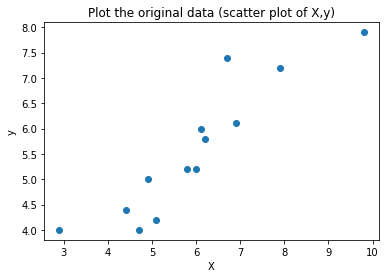

In [ ]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Plot the original data (scatter plot of X,y)")
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

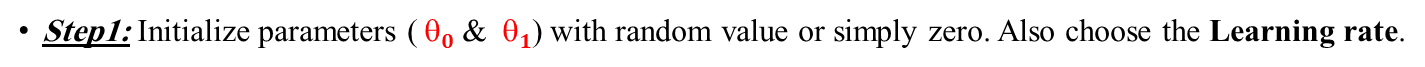

In [ ]:
theta_0=theta_1=0.1
#theta_0
#theta_1
learning_rate=0.01

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
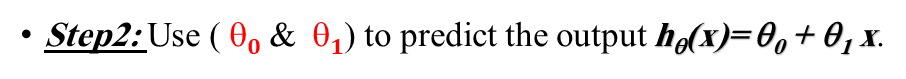
#### Note: you will need to iterate through all data points

In [ ]:
def predicting(theta_0,theta_1,X):
    h_x=(theta_0+theta_1*X)
    return h_x
predicting(theta_0,theta_1,X)

array([0.39000001, 0.76999998, 0.59000001, 0.89000001, 1.08000002,
       0.79000001, 0.70999999, 0.71999998, 0.7       , 0.60999999,
       0.56999998, 0.54000001, 0.68000002])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).
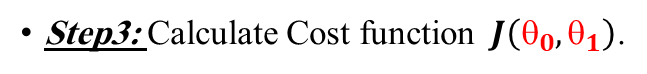
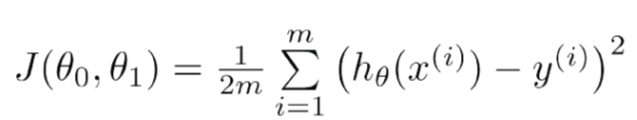

In [ ]:
def loss_fun(y_predicted,y_actual):
    return np.sum(((y_predicted-y_actual)**2))
#h_x=predicting(theta_0,theta_1,X)
#loss(h_x,y,len(y))

### Step4: Calculate the gradient.
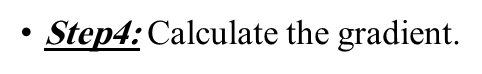
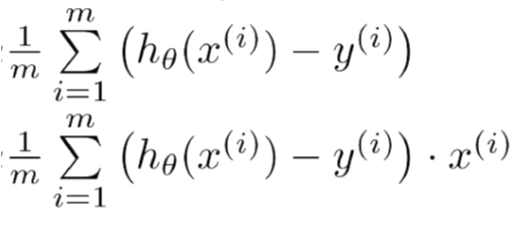

In [ ]:
def grad_theta0(h_x,y,m):
    return np.sum(h_x-y)/m
def grad_theta1(h_x,y,m,x):
    return np.sum((h_x-y)*(x.T))/m

### Step5: Update the parameters (simultaneously).
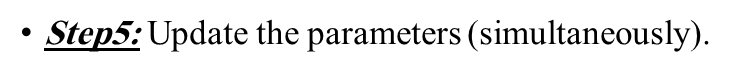

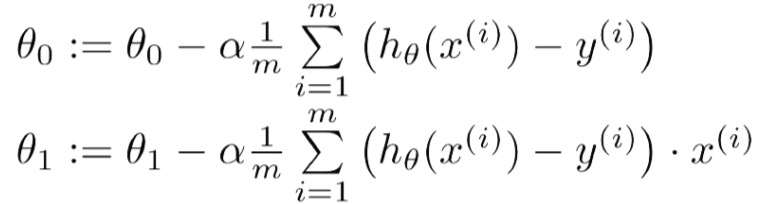

In [ ]:
def update_theta0(theta_0,alpha,h_x,y,m):
    return theta_0 - alpha* grad_theta0(h_x,y,m)
def update_theta1(theta_1,alpha,h_x,y,m,x):
    return theta_1 - alpha* grad_theta1(h_x,y,m,x)

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
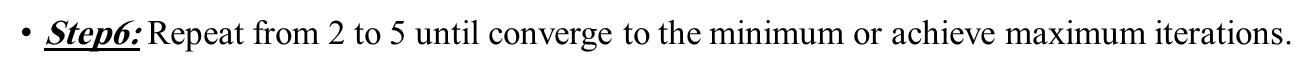

In [ ]:
def GD(x_points,y_points,eps,alpha,theta0,theta1):
  m=len(x_points)
  grad_norm=1
  grad=0
  loss=0
  while(grad_norm>=eps):
    # compute predicted y
    # compute the grad
    # update theta0,theta1
    y=theta0+theta1*x_points
    #print(y)
    loss=loss_fun(y,y_points)/(2*m) 
    #print(loss)
    theta0=theta0-alpha*np.sum((y-y_points))/m
    #print(theta0)
    theta1=theta1-alpha*np.sum((y-y_points)*(x_points.T))/m
    grad=[np.sum((y-y_points))/m,np.sum((y-y_points)*(x_points.T))/m]

    grad_norm=np.linalg.norm(grad)
  return theta0,theta1,y

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [ ]:
theta_0,theta_1,y_predicted=GD(X,y,1e-3,0.01,2,1)
theta_0,theta_1


(1.4483230164186554, 0.6923078894076128)

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

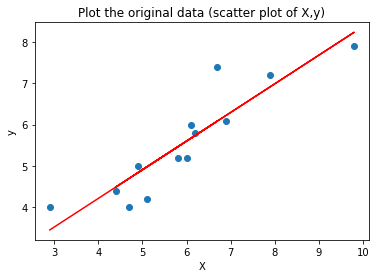

In [ ]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X,y_predicted,color='r')
plt.title("Plot the original data (scatter plot of X,y)")
plt.show()

#### Use R2 score to evaluate LR equation output
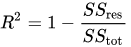
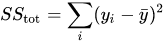
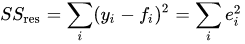


https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
r2_score(y,y_predicted)

0.8213066531187397

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [ ]:
def GD_vectorized(x_points,y_points,eps,alpha,theta,epochs):
  m=len(x_points)
  grad_norm=1
  grad=0
  loss=0
  for i in range(epochs):
    # compute predicted y
    # compute the grad
    # update theta0,theta1
    # theta 1x2 X 13x2 >>1x2 * 2x13 >> 1x13
    #print(x_points.shape)
    #print(theta.shape)
    y=theta @ x_points.T# 1x13
    #print(y.shape)
    #print(y_points.shape) #13x1
    loss=np.sum(((y.T-y_points)**2))
    # 1/2m * (xtheta-y).T(xtheta-y)
    #print(grad.shape)
    grad= np.array([(np.mean((y - y_points)@ x_points,axis=0))])
    theta=(theta - alpha*grad).flatten()
  return theta,y


X=regData_array[:,0]
y=regData_array[:,1]
#print(new_x)
#np.reshape(X,(13,2))
new_x=X.reshape(len(X),-1)
#print(new_x.shape)
new_x1=np.append(np.ones(new_x.shape),new_x,axis=1) # shape 13x2
theta=np.array(([2,1]))
theta_vect=theta.reshape(1,len(theta)) # shape 2x1
#print(theta_vect.shape)
y=y.reshape(1,len(y))
theta,y_predicted_vec=GD_vectorized(new_x1,y,1e-3,0.0001,theta_vect,100)
theta

array([1.93568149, 0.61827504])

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

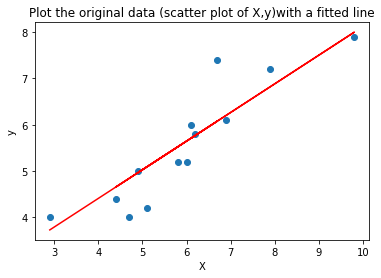

In [ ]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X,y_predicted_vec,color='r')
plt.title("Plot the original data (scatter plot of X,y)with a fitted line")
plt.show()

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [ ]:
def GD_vectorized(x_points,y_points,eps,alpha,theta,epochs=100):
  m=len(x_points)
  grad_norm=1
  grad=0
  loss=np.array([])
  for i in range(epochs):
    # compute predicted y
    # compute the grad
    # update theta0,theta1
    # theta 1x2 X 13x2 >>1x2 * 2x13 >> 1x13
    #print(x_points.shape)
    #print(theta.shape)
    y=theta @ x_points.T# 1x13
    #print(y.shape)
    #print(y_points.shape) #13x1
    loss=np.append(loss,np.sum(((y.T-y_points)**2)))
    # 1/2m * (xtheta-y).T(xtheta-y)
    #print(grad.shape)
    grad= np.array([(np.mean((y - y_points)@ x_points,axis=0))])
    theta=(theta - alpha*grad).flatten()
  return theta,y,loss


X=regData_array[:,0]
y=regData_array[:,1]
#print(new_x)
#np.reshape(X,(13,2))
new_x=X.reshape(len(X),-1)
#print(new_x.shape)
new_x1=np.append(np.ones(new_x.shape),new_x,axis=1) # shape 13x2
theta=np.array(([2,1]))
theta_vect=theta.reshape(1,len(theta)) # shape 2x1
#print(theta_vect.shape)
y=y.reshape(1,len(y))
theta,y_predicted_vec,loss=GD_vectorized(new_x1,y,1e-3,0.0001,theta_vect,100)

### Plot loss vs. iterations

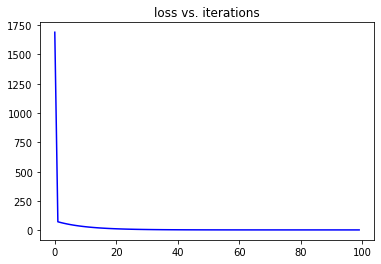

In [ ]:
epochs=100
iterations = list(range(0,epochs))
plt.plot(iterations,loss,color='b')
plt.title("loss vs. iterations")
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [ ]:
data=genfromtxt("MultipleLR.csv", delimiter=',')

In [ ]:
X=data[:,:-1]
y_mlr=data[:,-1:]

### Repeat your implementation but for more than one variable

In [ ]:
def GD_vectorized_mlR(x_points,y_points,alpha,theta,epochs):
  m=len(x_points)
  grad=0
  loss=np.array([])
  #print(y_points)
  for i in range(epochs):
    # compute predicted y
    # compute the grad
    # update theta
    y=(theta @  np.transpose(x_points))
    loss=np.append(loss,.5*len(y)*(np.linalg.norm(y-y_points))**2)
    grad= np.array([(np.mean((y - y_points)@ x_points,axis=0))]).flatten()
    #print(grad)
    theta=(theta - alpha*grad)
  return theta,y,loss


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [ ]:

# add 1 to x
#print(theta.shape)
new_x=X.reshape(len(X),-1)
new_x1=np.append(new_x,np.ones((X.shape[0],1)),axis=1)
#print(new_x1)
y_mlr=y_mlr.reshape(len(y),-1)
#print(y)
theta=np.array([[0] * (new_x1.shape[1])])
theta,y_new,loss=GD_vectorized_mlR(new_x1,y_mlr,0.000001,theta,1000)
y_new

array([[149.87798253, 181.19134823, 177.90474144, 194.6814644 ,
        137.69924459, 103.11154526, 146.839905  , 110.37656746,
        170.73398579, 160.31369877, 140.83158867, 139.69458888,
        182.85553259, 150.75013066, 147.77772411, 184.66017603,
        142.76658577, 176.550964  , 174.01679926, 155.76659279,
        171.9991715 , 170.83357614, 163.63358765, 148.9200477 ,
        187.17106899]])

### Plot loss vs. iterations

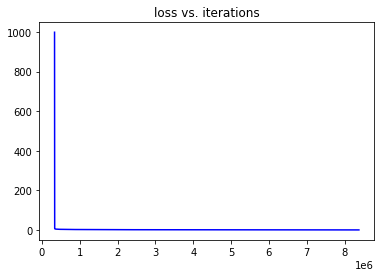

In [ ]:
epochs=1000
iterations = list(range(0,epochs))
plt.plot(loss,iterations,color='b')
plt.title("loss vs. iterations")
plt.show()

#### Use R2 score to evaluate LR equation output

In [ ]:
r2_score(y_mlr,y_new.T)

0.968417697279664

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [ ]:
from sklearn.linear_model import LinearRegression
data =genfromtxt("RegData.csv",delimiter=',')
x = data[:,:-1]
y = data[:,-1:]

#### Train the model (fit the model to the training data)

In [ ]:
model_reg= LinearRegression().fit(x, y)

#### Predict y values using the trained model

In [ ]:
pred = model_reg.predict(x)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

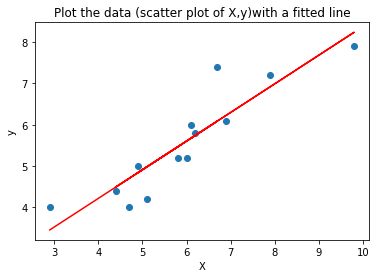

In [ ]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("y")
plt.plot(x,pred,color='r')
plt.title("Plot the data (scatter plot of X,y)with a fitted line")
plt.show()

#### Use R2 score to evaluate model output

In [ ]:
r2_score(y,pred)

0.8213156778363777

### Repeat for Mulivariate

In [ ]:
data =genfromtxt("MultipleLR.csv",delimiter=',')
x = data[:,:-1]
y = data[:,-1:]

In [ ]:
model_reg= LinearRegression().fit(x, y)

In [ ]:
pred = model_reg.predict(x)

In [ ]:
r2_score(y,pred)

0.9896615789448399